In [6]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/iris.data'

# Define the column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset with custom column names
df = pd.read_csv(file_path, header=None, names=column_names)

# Initial exploration
print("Dataset shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (150, 5)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


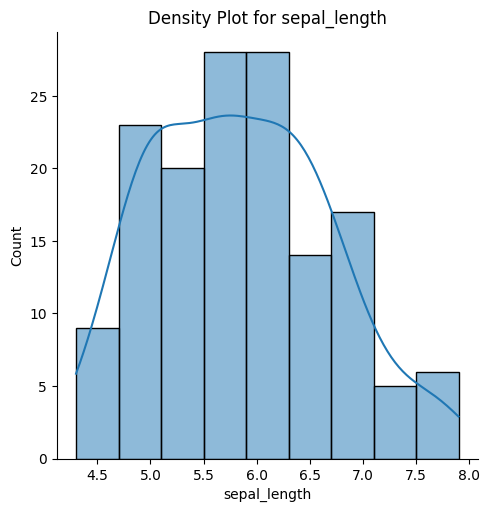

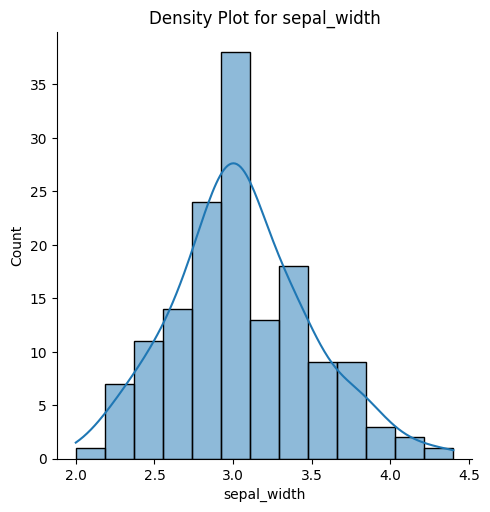

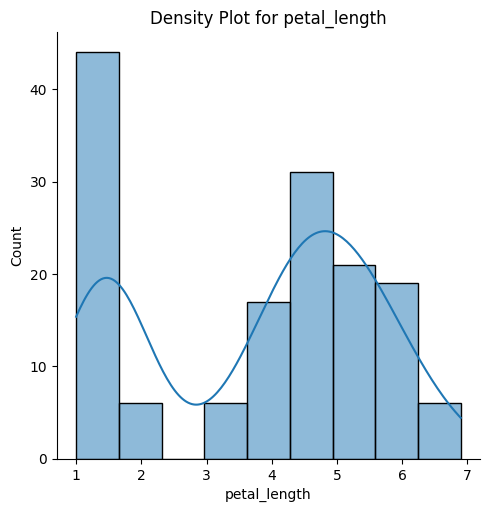

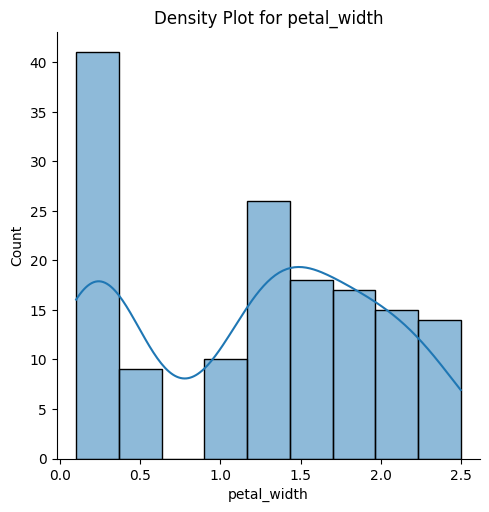

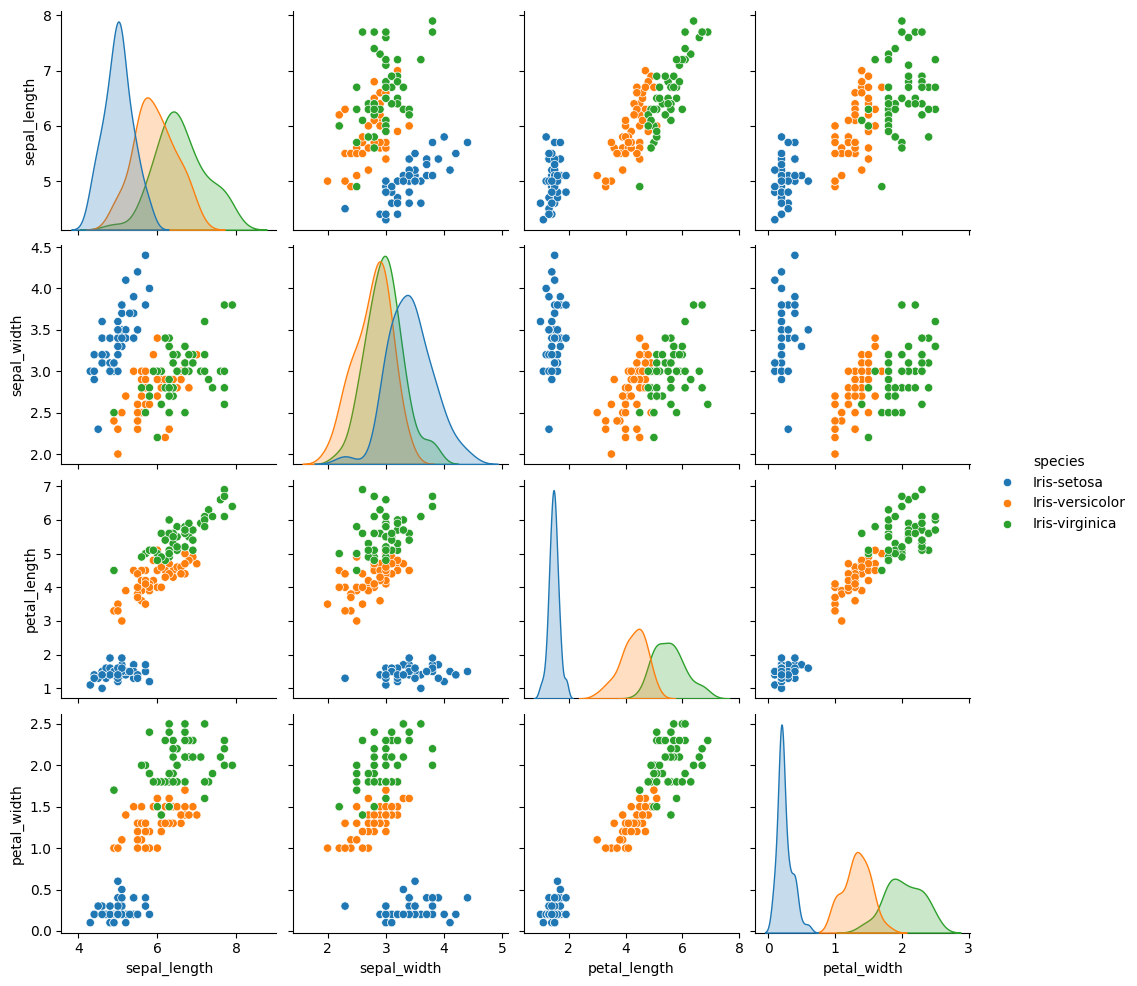

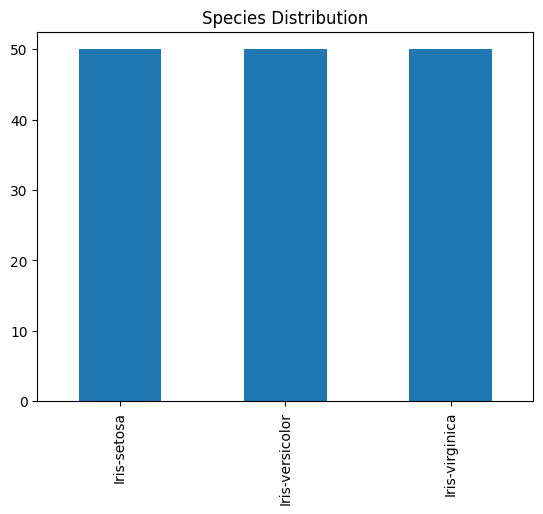

In [7]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Density Plots/Histograms for Numerical Variables
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    sns.displot(df[feature], kde=True)
    plt.title(f'Density Plot for {feature}')
    plt.show()

# Scatter Plots for Identifying Clusters
sns.pairplot(df, hue='species')
plt.show()

# Balance of Labels
df['species'].value_counts().plot(kind='bar')
plt.title('Species Distribution')
plt.show()


Unrestricted Model Accuracy: 1.0
Simplified Model Accuracy: 1.0


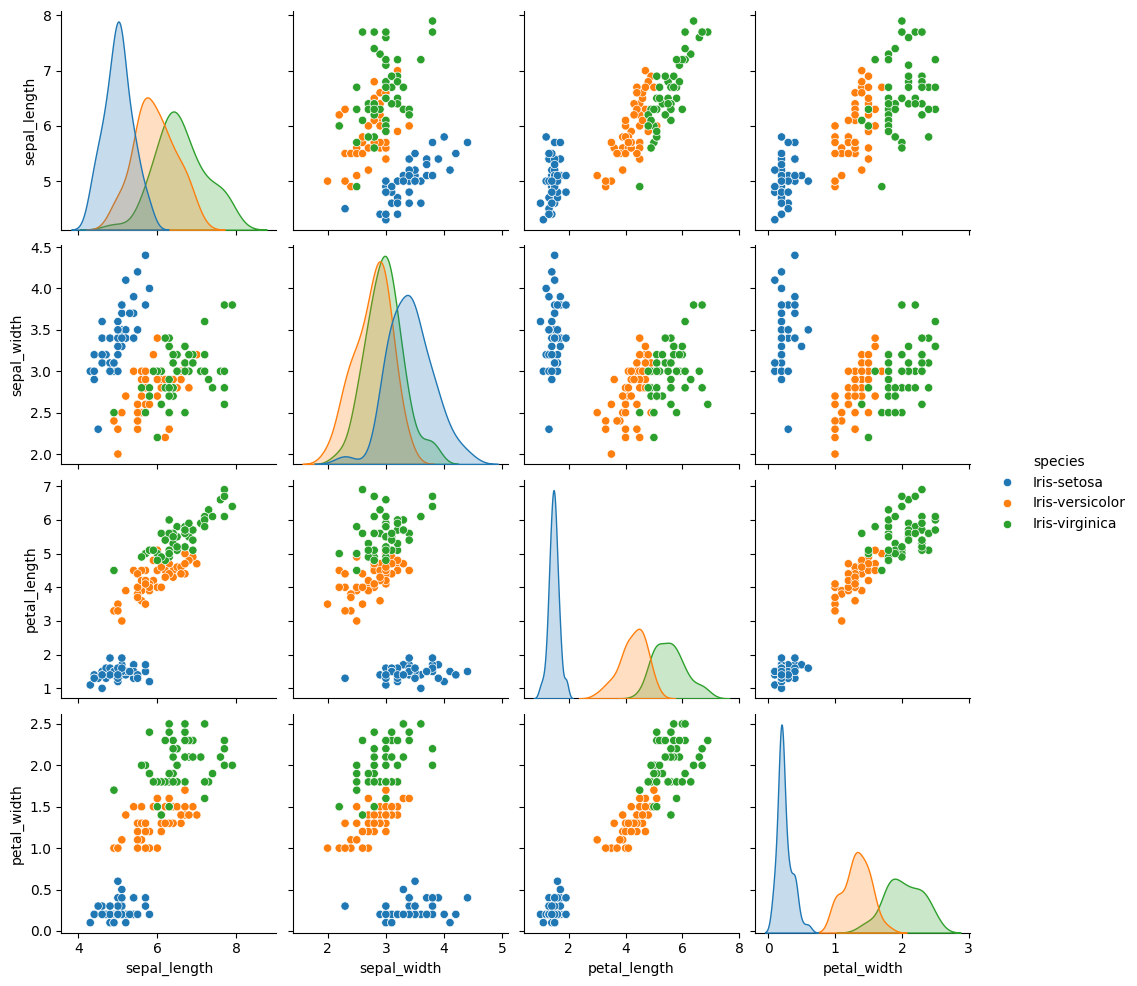

In [14]:
# Importing libraries for modeling, evaluation, and visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Preparing data for modeling
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Evaluating the Unrestricted Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Unrestricted Model Accuracy:", accuracy_score(y_test, y_pred))

# Finding a Simplified Model
simplified_model = DecisionTreeClassifier(max_depth=3)
simplified_model.fit(X_train, y_train)
y_pred_simple = simplified_model.predict(X_test)
print("Simplified Model Accuracy:", accuracy_score(y_test, y_pred_simple))

# Optional: Scatter Plot Matrix for Simplified Model Variables
# This can be useful for visualizing decision boundaries but is not required for model evaluation.
sns.pairplot(df, hue='species', vars=features)
plt.show()

sepal_length and sepal_width are mostly unimodal, suggesting a single common group for each. petal_length and petal_width are bimodal, indicating two distinct groups, likely due to different Iris species.

Scatter plots clearly show clusters for the three Iris species, especially with petal_length and petal_width. These clusters match well with the decision tree's decision boundaries, showing the model's effective use of these features.

The dataset is balanced across the three Iris species, ensuring no bias in model training and performance.

The unrestricted decision tree model accurately classifies the Iris species, proving its effectiveness. A simplified model, even with reduced complexity, maintains good accuracy, showing efficiency in simpler models.

Both models agree on the main classifications, reflecting the natural grouping of Iris species and highlighting the models' ability to distinguish between species accurately.

The scatter plot matrix for the simplified model shows clear species separations, aligning with the model's decisions. This supports the model's accuracy in reflecting the data's natural patterns.